<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#项目介绍" data-toc-modified-id="项目介绍-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>项目介绍</a></span></li><li><span><a href="#环境准备" data-toc-modified-id="环境准备-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>环境准备</a></span></li><li><span><a href="#数据预处理" data-toc-modified-id="数据预处理-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>数据预处理</a></span></li><li><span><a href="#各类农产品批发价的历史变化" data-toc-modified-id="各类农产品批发价的历史变化-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>各类农产品批发价的历史变化</a></span><ul class="toc-item"><li><span><a href="#畜禽产品" data-toc-modified-id="畜禽产品-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>畜禽产品</a></span></li><li><span><a href="#水产品" data-toc-modified-id="水产品-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>水产品</a></span></li><li><span><a href="#水果" data-toc-modified-id="水果-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>水果</a></span></li><li><span><a href="#蔬菜" data-toc-modified-id="蔬菜-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>蔬菜</a></span></li></ul></li><li><span><a href="#农产品批发价的历史波动幅度" data-toc-modified-id="农产品批发价的历史波动幅度-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>农产品批发价的历史波动幅度</a></span></li><li><span><a href="#使用多元回归计算农产品价格的趋势和季节性" data-toc-modified-id="使用多元回归计算农产品价格的趋势和季节性-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>使用多元回归计算农产品价格的趋势和季节性</a></span><ul class="toc-item"><li><span><a href="#如何计算季节性" data-toc-modified-id="如何计算季节性-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>如何计算季节性</a></span></li><li><span><a href="#计算所有农产品的季节性信息" data-toc-modified-id="计算所有农产品的季节性信息-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>计算所有农产品的季节性信息</a></span></li><li><span><a href="#哪些农产品的季节性更强？" data-toc-modified-id="哪些农产品的季节性更强？-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>哪些农产品的季节性更强？</a></span></li></ul></li><li><span><a href="#时令蔬菜有哪些？" data-toc-modified-id="时令蔬菜有哪些？-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>时令蔬菜有哪些？</a></span></li><li><span><a href="#哪些农产品的价格有明显的涨跌？" data-toc-modified-id="哪些农产品的价格有明显的涨跌？-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>哪些农产品的价格有明显的涨跌？</a></span></li></ul></div>


## 项目介绍

又到了吃西瓜的季节。之所以在夏季吃西瓜，不仅仅因为其可以解暑，而且在夏天是西瓜的大量上市时期，价格还会比较便宜。在我们的食谱中，还有许多像西瓜这样的具有明显季节性的食材。这次的项目将通过分析农产品批发价的时间序列数据，发现具有强季节性的蔬菜，为在合适的季节吃合适的蔬菜提供参考。同时也对过去几年农产品的价格变化趋势进行了解。其中的主要发现包括：  

- 价格具有强季节性的农产品主要是蔬菜和水果。例如菠菜、韭菜在春季，西瓜、冬瓜在夏季，巨峰葡萄在秋季，莲藕在冬季的价格会较低。  
- 在过去两年里，约54.3%的农产品有明显的价格变化趋势。其中大部分为价格上升趋势，以水产品为代表。而猪肉和生姜是少有的有着价格下降趋势的产品。  

不过，价格变化不仅受到农产品供给变化的影响，还会受到市场需求、运输存储、制度政策等变化的影响。因此如果要确认是否真的是时令蔬菜，还应结合农产品的实际培育周期来进行校验。  

-  数据说明  

数据来自中国农业农村部在过去两年（2021年9月到2023年8月）从全国批发市场采集的逐月农产品批发价格数据。数据中涉及到的农产品品种包含5种畜禽产品、5种水果、7种水产品以及28种蔬菜。

- 关键词

matplotlib、seaborn可视化、多元回归

## 环境准备

python --3.11.5  
numpy  
pandas  
matplotlib  
seaborn

In [23]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cycler
import seaborn as sns

plt.style.use("seaborn-v0_8-darkgrid")

colors = mpl.cm.Dark2(range(7))

mpl_config = {
    "font.family": "Microsoft YaHei",
    "figure.figsize": (16, 5),
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "axes.titlepad":8,
    "axes.labelsize":12,
    'axes.prop_cycle':cycler(color=colors)
}


mpl.rcParams.update(mpl_config)

In [24]:
raw_df = pd.read_csv('./wholesale_price_of_agricultural_products.csv')
raw_df.head()

,year_month,product,price,category
0,202308,Garlic moss,8.40,Vegetable
1,202308,Zucchini,2.73,Vegetable
2,202308,Lettuce,3.58,Vegetable
3,202308,Celery,3.76,Vegetable
4,202308,Rape,3.96,Vegetable


## 数据预处理

In [25]:
# 为贴近常用的农产品标价单价，将原本的价格单位`元/公斤`转化为`元/斤`。（一公斤等于一千克，一斤等于500克）

df = raw_df.assign(
    year_month = raw_df["year_month"].astype("str")
).rename({"price":"price_1kg"},axis=1)

df = df.assign(
    year = df["year_month"].map(lambda x:int(x[:4])),
    month = df["year_month"].map(lambda x:int(x[-2:])),
    year_month = df["year_month"].map(lambda x:f"{x[:4]}-{x[-2:]}"),
    price_500g = df["price_1kg"]/2
)

df.head(10)

,year_month,product,price_1kg,category,year,month,price_500g
0,2023-08,Garlic moss,8.40,Vegetable,2023,8,4.200
1,2023-08,Zucchini,2.73,Vegetable,2023,8,1.365
2,2023-08,Lettuce,3.58,Vegetable,2023,8,1.790
3,2023-08,Celery,3.76,Vegetable,2023,8,1.880
4,2023-08,Rape,3.96,Vegetable,2023,8,1.980
5,2023-08,Pumpkin,2.55,Vegetable,2023,8,1.275
6,2023-08,Scallion,3.19,Vegetable,2023,8,1.595
7,2023-08,Glass lettuce,4.91,Vegetable,2023,8,2.455
8,2023-08,Cauliflower,3.76,Vegetable,2023,8,1.880
9,2023-08,Ginger,16.29,Vegetable,2023,8,8.145


## 各类农产品批发价的历史变化

In [26]:
def get_season(month):
    """将月份映射到季度上"""
    if month in (12,1,2):
        return 0
    elif month in (3,4,5):
        return 1
    elif month in (6,7,8):
        return 2
    elif month in (9,10,11):
        return 3

In [27]:
def get_title(products,category):
    if category is not None:
        target_name = f"Various {category}"
    else:
        max_target_show = 3
        target_name = "、".join(products[:max_target_show])
        if len(products) > max_target_show:
            target_name += "etc."
    title = f"Historical prices of {target_name}（September 2021 - August 2023）"
    return title

In [28]:
from collections.abc import Iterable

UNIQUE_YEAR_MONTH = sorted(set(df["year_month"].values))

def plot_ts(products=None, category=None, ax=None, fig=None):
    """绘制部分产品的价格历史变化图

    Parameters
    ----------
    products : list or str, optional
        产品名称或产品名称的列表
    category : str, optional
        品类名称
    ax: mpl.axes.Axes, optional
        如果为空，则会重新创建图层
    fig: matplotlib.Figure, optional
        如果为空，则会重新创建画布
    """

    if isinstance(products, Iterable):
        _products = products
    elif isinstance(products, str):
        _products = [products]
    elif isinstance(category, str):
        _products = list(
            set(df.query(f"category == '{category}'")["product"].values))
    else:
        raise Exception("未正确设置products或category")

    if ((ax is None) or (fig is None)):
        _fig, _ax = plt.subplots(figsize=(23, 10))
    else:
        _fig, _ax = fig, ax

    # 绘制价格历史变化折线图

    y_max = 0
    for product in _products:
        cdf = df.query(f"product == '{product}'").sort_values("year_month")
        y = cdf["price_500g"].values
        y_max = max(max(y), y_max)
        _ax.plot(UNIQUE_YEAR_MONTH, y, "-o", label=product)
    _ax.set_ylim(0,)
    tick_labels = [i[-5:] for i in UNIQUE_YEAR_MONTH]
    _ax.set_xticks(range(len(UNIQUE_YEAR_MONTH)), tick_labels)

    title = get_title(products, category)
    _ax.set_title(title, pad=20)
    _ax.set_ylabel("Wholesale Price(RMB/500g)", labelpad=30)
    _ax.set_xlabel("Date", labelpad=10)

    # 使用imshow绘制四季背景色

    data = [[get_season(int(x[-2:])) for x in UNIQUE_YEAR_MONTH]]

    cmap = mpl.colors.ListedColormap(
        ['LightBlue', "YellowGreen", "Tomato", "SandyBrown"])

    ims = _ax.imshow(
        data,
        extent=(0, len(UNIQUE_YEAR_MONTH), 0, y_max*1.1),
        cmap=cmap,
        alpha=0.8)

    # 调整ticks的位置，使得label可以对应到每个颜色的中央
    colorbar_ticks = [0.4, 1.15, 1.85, 2.6]
    colorbar_labels = ["Winter", "Spring", "Summer", "Autumn"]
    colorbar = _fig.colorbar(ims,
                             ax=_ax,
                             label="Seasons",
                             ticks=colorbar_ticks,
                             orientation='horizontal',
                             shrink=0.2)
    colorbar.set_ticklabels(colorbar_labels)
    _ax.legend(loc='upper right', bbox_to_anchor=(0.6, 0.5, 0.5, 0.5))
    _ax.set_aspect("auto")


 #plot_ts(category='水产品')

### 畜禽产品

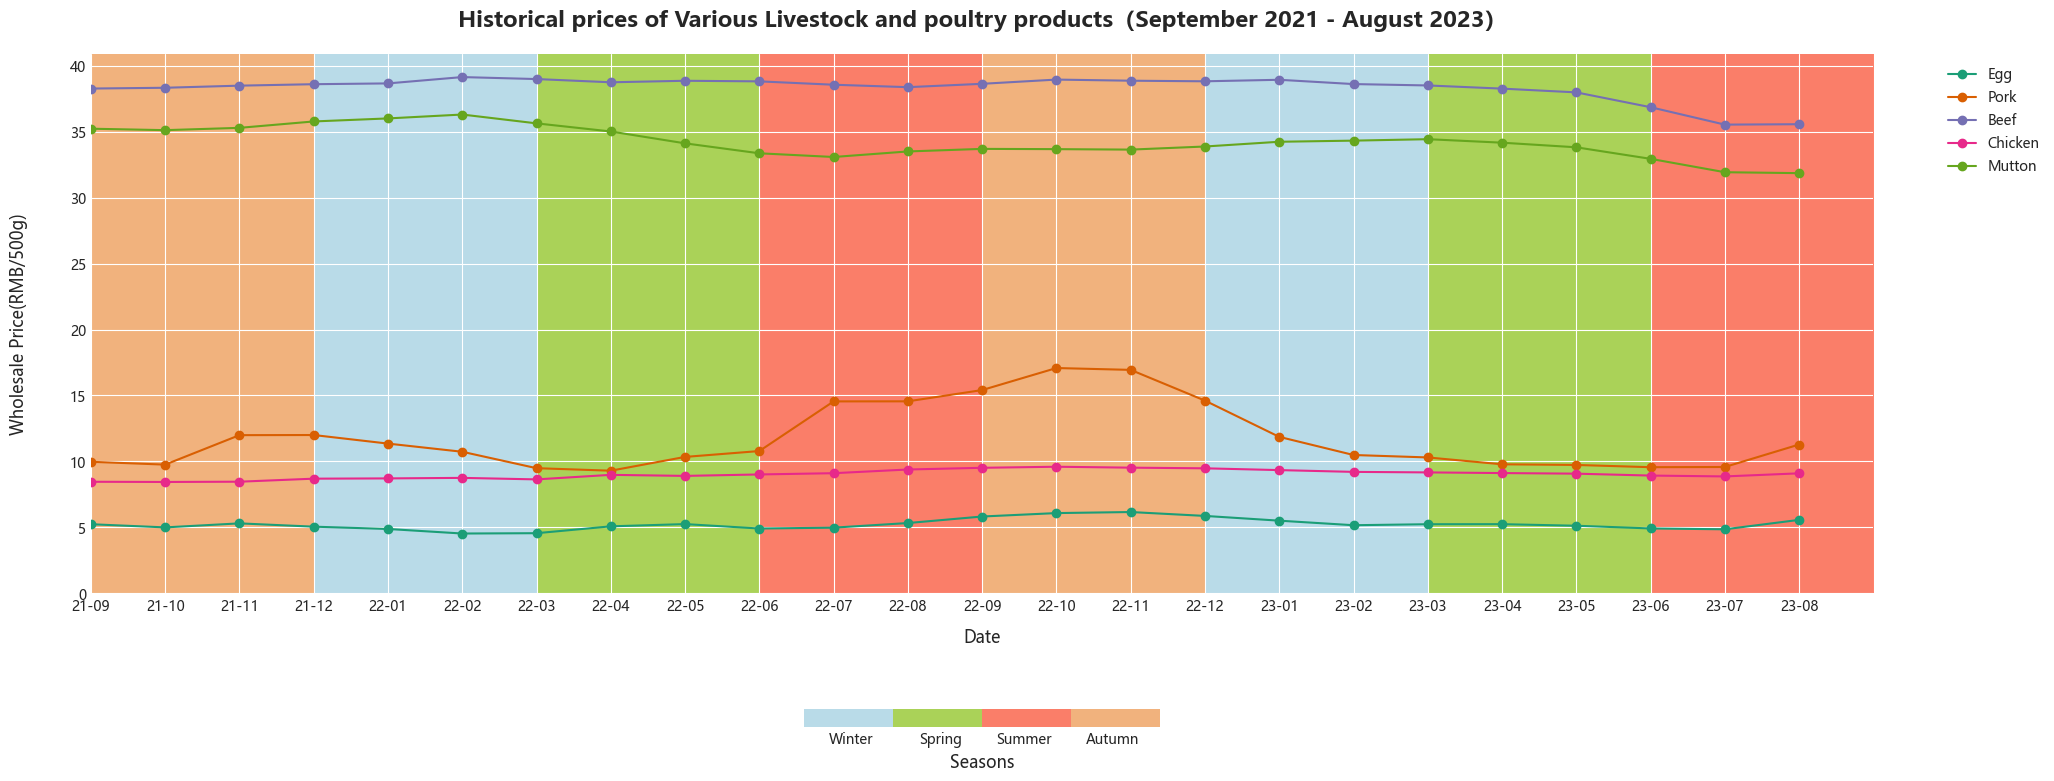

In [29]:
plot_ts(category="Livestock and poultry products")

从畜禽产品的价格历史变化可以看出：  

- 猪肉的价格有一个明显的上升过程。主要上升的时间段发生在2022年6月到2022年10月，从10元/斤左右的价格上升到15元/斤左右。  
- 除猪肉之外的其他畜禽产品价格则较为稳定。

### 水产品

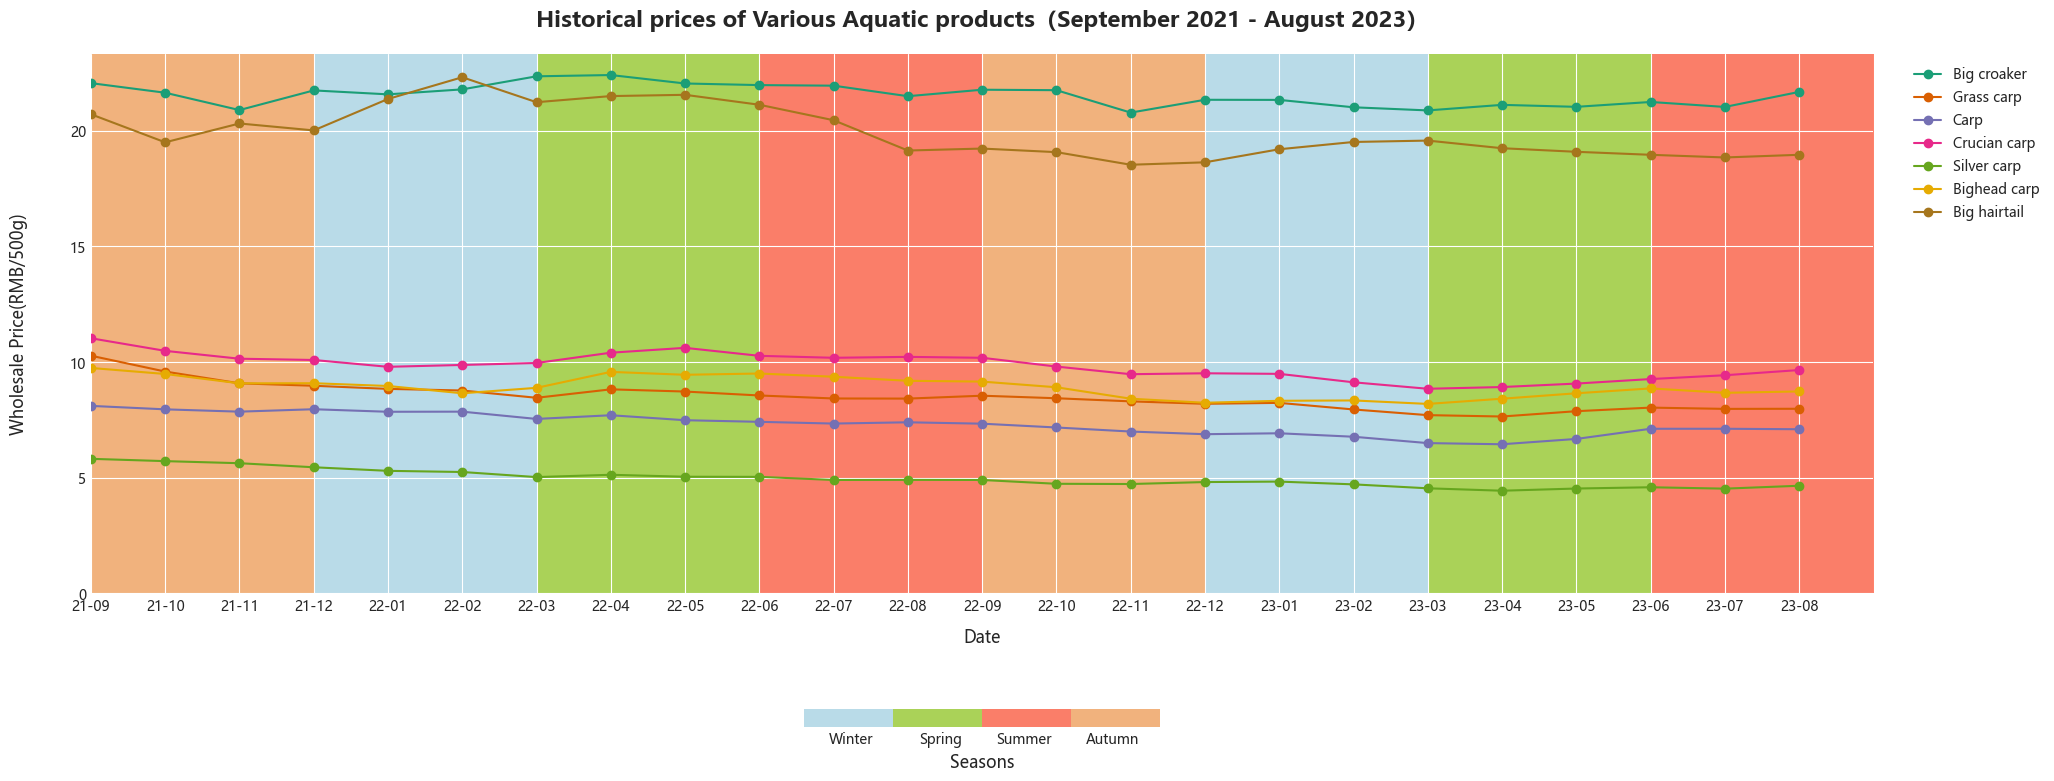

In [30]:
plot_ts(category="Aquatic products")

从水产品的价格历史变化可以看出：  

- 水产品的价格整体呈小幅上升的趋势。
- 淡水鱼类，如鲫鱼和草鱼，在2022年秋季经历了显著的价格下降，然后在2023年春季逐渐恢复。

### 水果

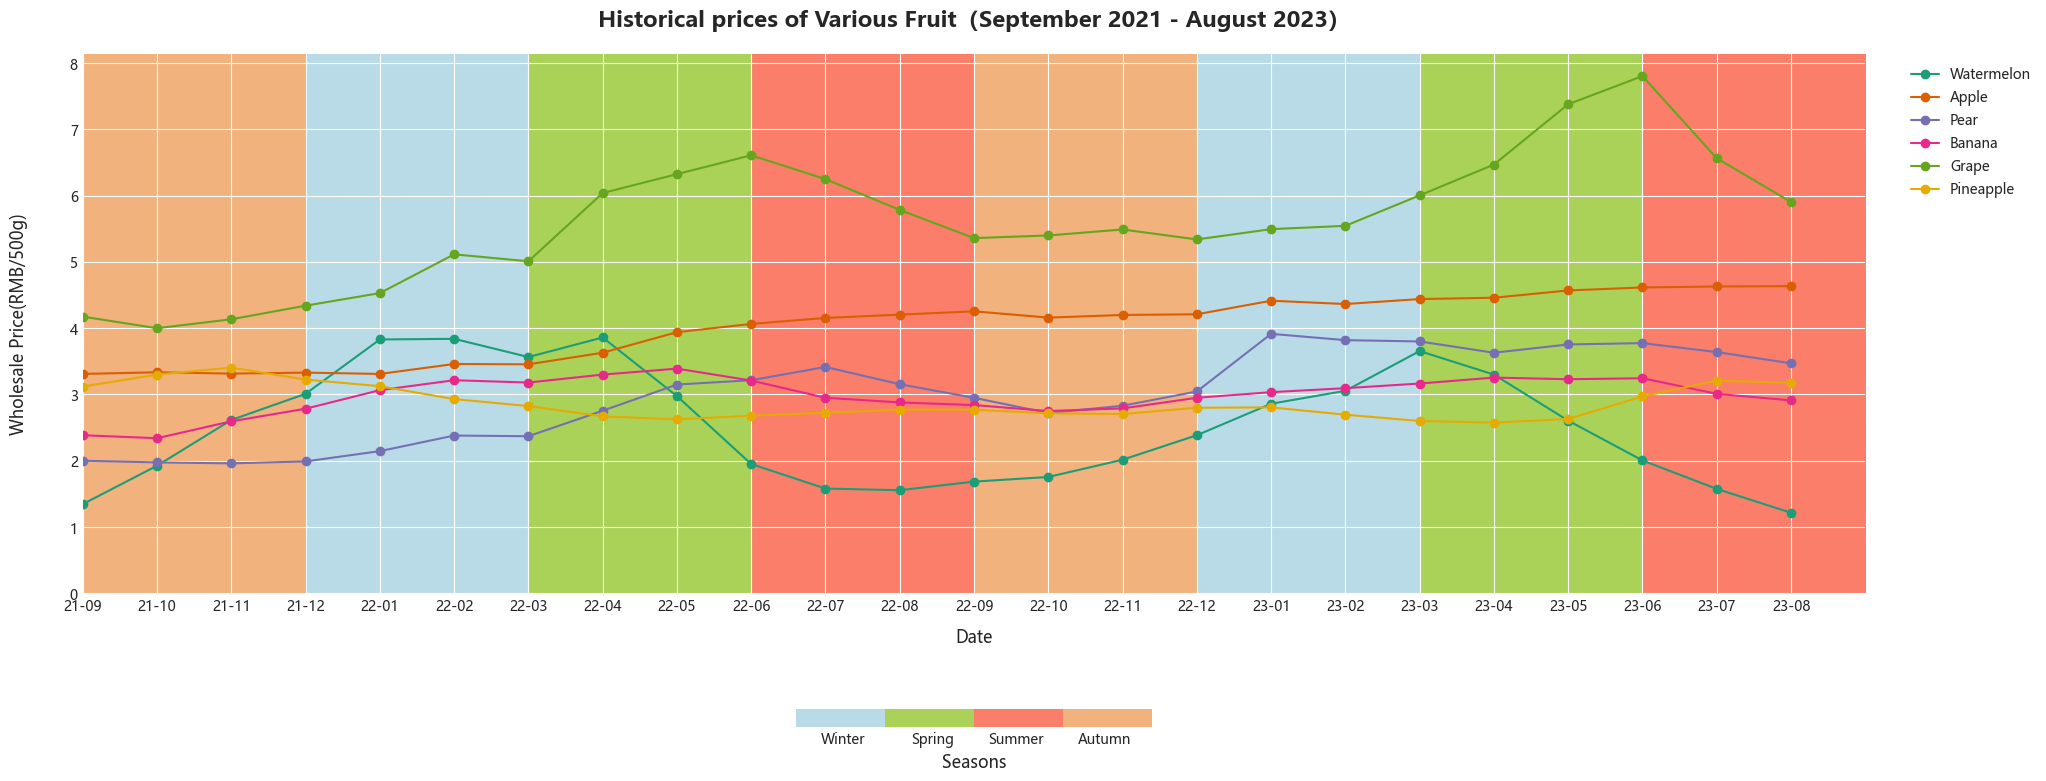

In [31]:
plot_ts(category="Fruit")

水果有着更加明显的季节性  

- 巨峰葡萄在秋季价格较低，而在春末夏初达到价格顶峰。  
- 人人都喜欢的西瓜在夏季和初秋的价格会比较低，因此即使是遇到了秋老虎，我们仍然可以买到便宜的西瓜。

### 蔬菜

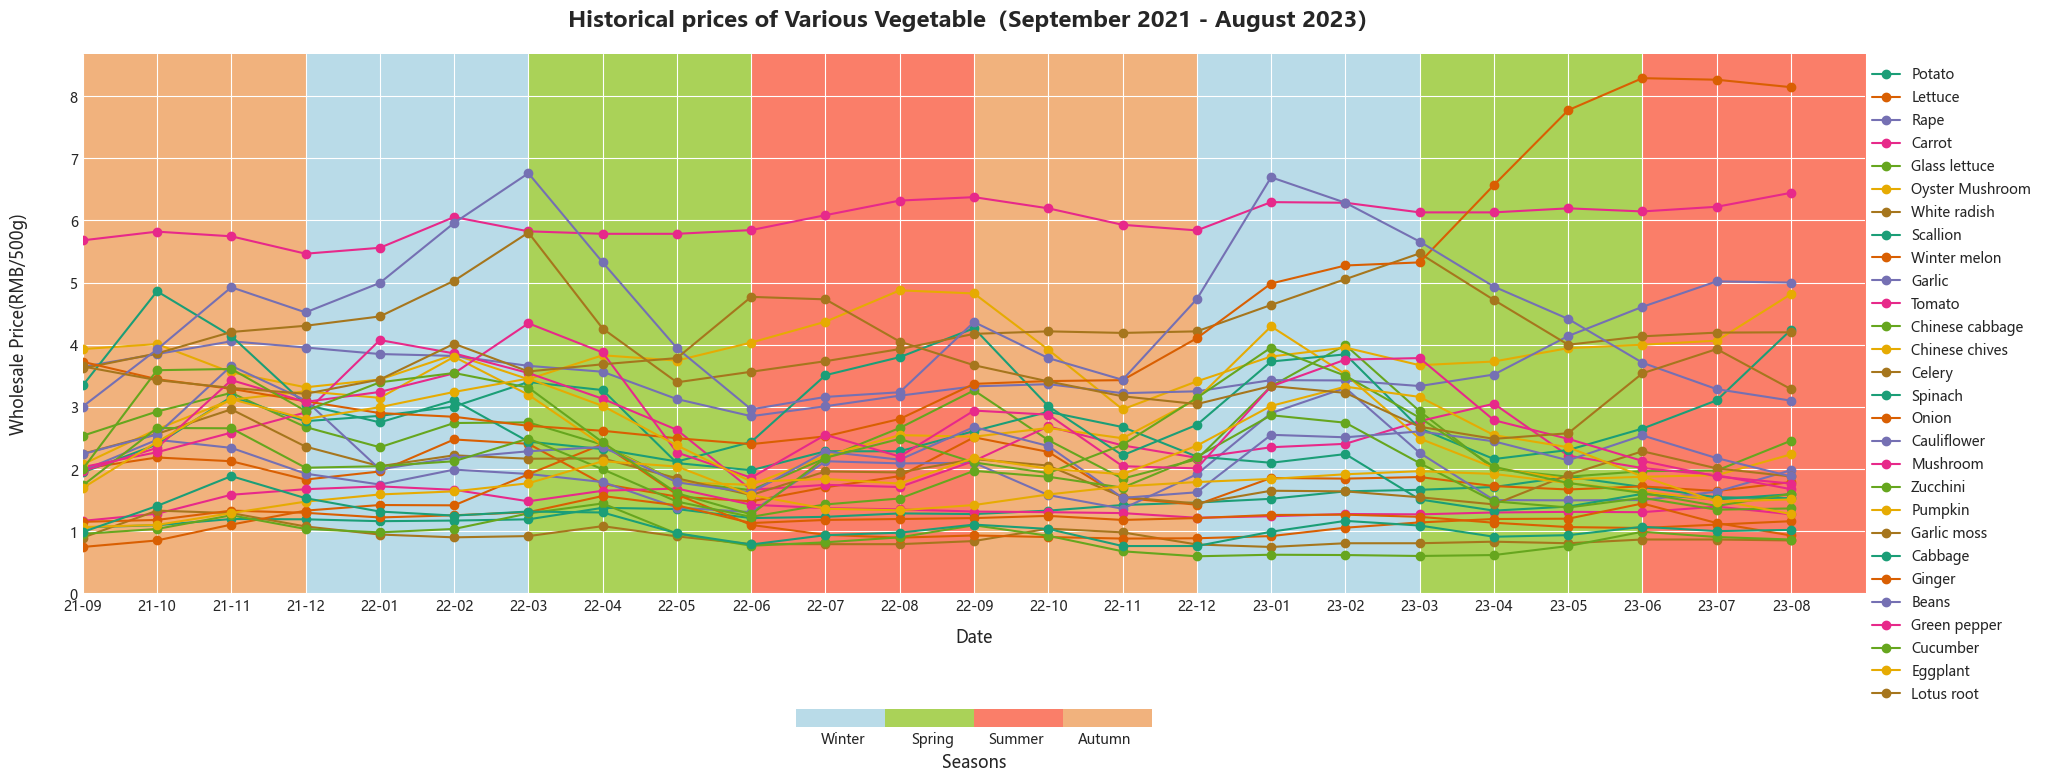

In [32]:
plot_ts(category="Vegetable")

蔬菜种类众多，全部展示出来的效果比较差。后面会用其他方式分析其价格变化的规律。

## 农产品批发价的历史波动幅度

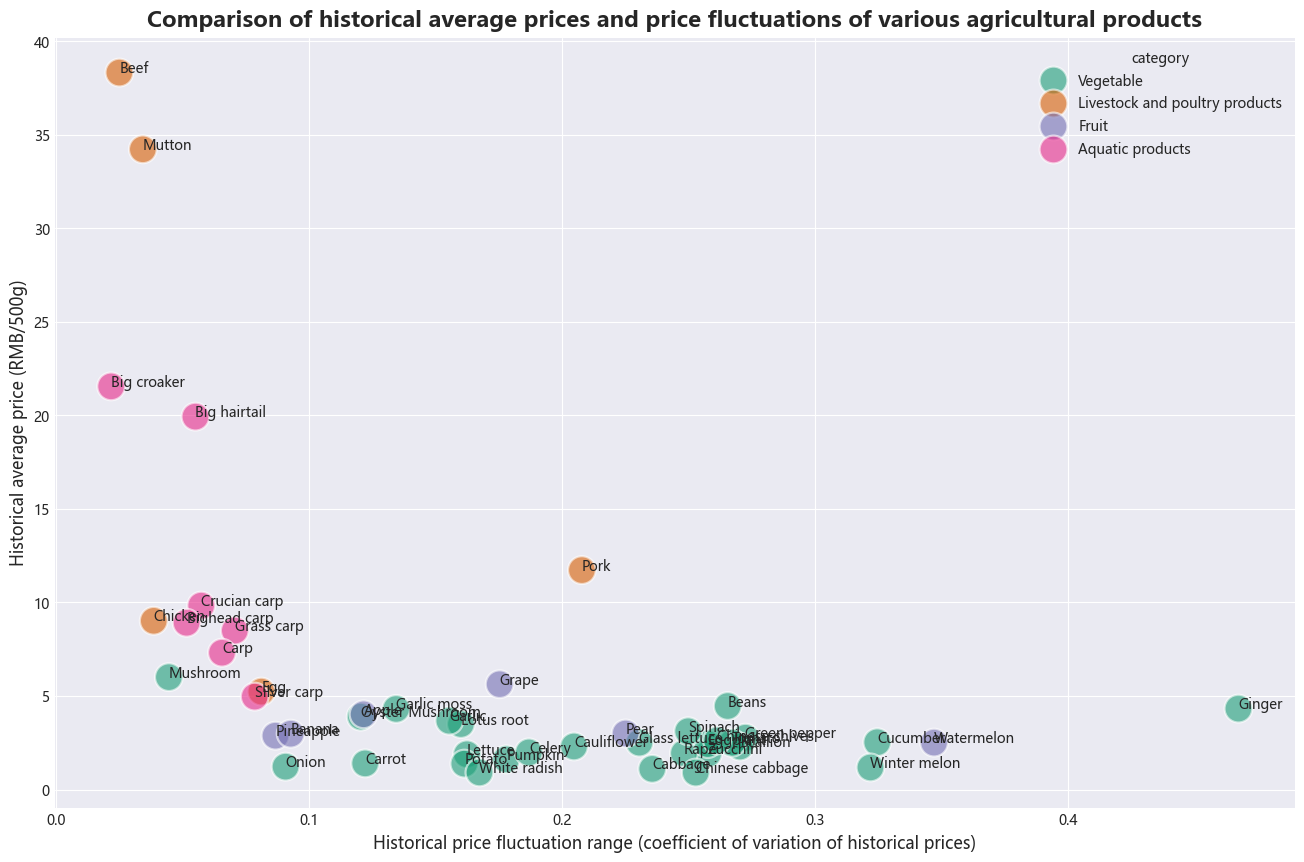

In [33]:
# 基于农产品和品类的数据汇总
product_gdf = df.groupby(["product", "category"]).agg(
    price_500g_std=("price_500g", "std"),
    price_500g_max=("price_500g", "max"),
    price_500g_min=("price_500g", "min"),
    price_500g_mean=("price_500g", "mean")
)

# 计算价格的变异系数（coefficient of variation）
product_gdf = product_gdf.assign(
    price_500g_varc=product_gdf["price_500g_std"] /
    product_gdf["price_500g_mean"]
)

def plot_price_varc_chart():
    _, ax = plt.subplots(figsize=(16, 10))

    sns.scatterplot(data=product_gdf.reset_index().sort_values("category",ascending=False), x="price_500g_varc", y="price_500g_mean",
                    hue="category", alpha=0.6, ax=ax, s=400)
    for product, i, j in product_gdf.reset_index()[["product", "price_500g_varc", "price_500g_mean"]].values:
        ax.text(i, j, product)

    ax.set_title("Comparison of historical average prices and price fluctuations of various agricultural products")
    ax.set_xlabel("Historical price fluctuation range (coefficient of variation of historical prices)")
    ax.set_ylabel("Historical average price (RMB/500g)")


plot_price_varc_chart()


上面对比了各个农产品的历史平均价格和历史价格的波动幅度：  

- 波动幅度较大的农产品以蔬菜为主。且在蔬菜里面，瓜果类的价格变动会更高，根茎类/菇类的蔬菜价格波动较小，叶菜类的价格波动居中。这可能和不同蔬菜的培育和存储特点有关。  
- 猪肉的位置非常显眼，其在平均价格较高的情况下仍然有较大的价格波动幅度。其价格变化也确实在过去几年引起了人们的普遍关注。  
- 西瓜和鸭梨是水果品类中价格波动最大的两个产品。这可能体现了其较强的季节性。  
- 价格较高的牛肉、羊肉等的价格波动幅度较小。  

PS：  

$$  

历史价格波动幅度 = 历史价格的变异系数 = \frac{历史价格的标准差}{历史价格的平均值}  

$$

## 使用多元回归计算农产品价格的趋势和季节性  

### 如何计算季节性  

下面使用多元回归的方法来分析价格的季节性。以西瓜为例，其步骤为：  

1. 选取西瓜的历史批发价数据。本数据集中一共有24个月的数据。  
2. 将每个月的价格视为回归的目标变量。  
3. 将24个月按照顺序赋予从1到24的序号，作为趋势的特征变量。  
4. 对月份进行One-Hot编码，得到从1月到12月的12个特征变量。每条西瓜的价格记录都会在其中某个月的特征变量中标注为1，其他月份则为0。  
5. 基于上述特征变量，针对目标变量价格构建多元回归模型  
6. 以回归模型针对趋势特征变量的系数代表价格变化趋势，以各个月份特征变量的系数代表该月对价格的影响，即季节性影响。

In [34]:
import statsmodels.api as sm

def fit_regression_model(product):

    sdf = df.query(f"product == '{product}'")
    sdf = sdf.sort_values("year_month").assign(
        ts_rank = range(1,sdf.shape[0]+1),
        constant = 1,
        month = sdf["month"].map(lambda x:f"month-{x:02}")
    )
    sdf = pd.concat([sdf,pd.get_dummies(sdf["month"])],axis=1)

    # 包含1个序列，12个月和一个常数列，所以是最后14列
    feature_names = sdf.columns[-14:]
    target_name = "price_500g"
    X = sdf[feature_names].values
    y = sdf[target_name]

    model = sm.OLS(y, sdf[feature_names].astype(float))
    fit_result = model.fit()
    return model,fit_result,X,y

product = 'Watermelon'
model,fit_result,X,y = fit_regression_model(product)

下面是以西瓜为例的拟合结果，可以看到各个特征变量的参数及其P值的结果

In [35]:
fit_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price_500g   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     17.46
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           1.92e-05
Time:                        10:37:53   Log-Likelihood:                 5.7818
No. Observations:                  24   AIC:                             14.44
Df Residuals:                      11   BIC:                             29.75
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ts_rank       -0.0274      0.010     -2.863      0.015      -0.048      -0.006
constant       2.6296      0.122     21.499      0.000       2.360       2.899
month-01       1.0164      0.190      5.341      0.000       0.598       1.435
month-02       1.1463      0.190      6.024      0.000       0.727       1.565
month-03       1.3361      0.191      7.005      0.000       0.916       1.756
month-04       1.3335      0.192      6.957      0.000       0.912       1.755
month-05       0.5709      0.193      2.957      0.013       0.146       0.996
month-06      -0.2143      0.195     -1.099      0.295      -0.643       0.215
month-07      -0.5869      0.197     -2.975      0.013      -1.021      -0.153
month-08      -0.7521      0.200     -3.760      0.003      -1.192      -0.312
month-09      -0.9230      0.195     -4.731      0.001      -1.352      -0.494
month-10      -0.5707      0.193     -2.954      0.013      -0.996      -0.145
month-11      -0.0683      0.192     -0.356      0.728      -0.490       0.354
month-12       0.3416      0.191      1.790      0.101      -0.078       0.761
==============================================================================
Omnibus:                        2.020   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.364   Jarque-Bera (JB):                1.080
Skew:                          -0.000   Prob(JB):                        0.583
Kurtosis:                       1.961   Cond. No.                     4.11e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.91e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

通过上述方法，我们可以从价格的时间序列中分离出价格的趋势和季节性。分离后的效果如下图所示。

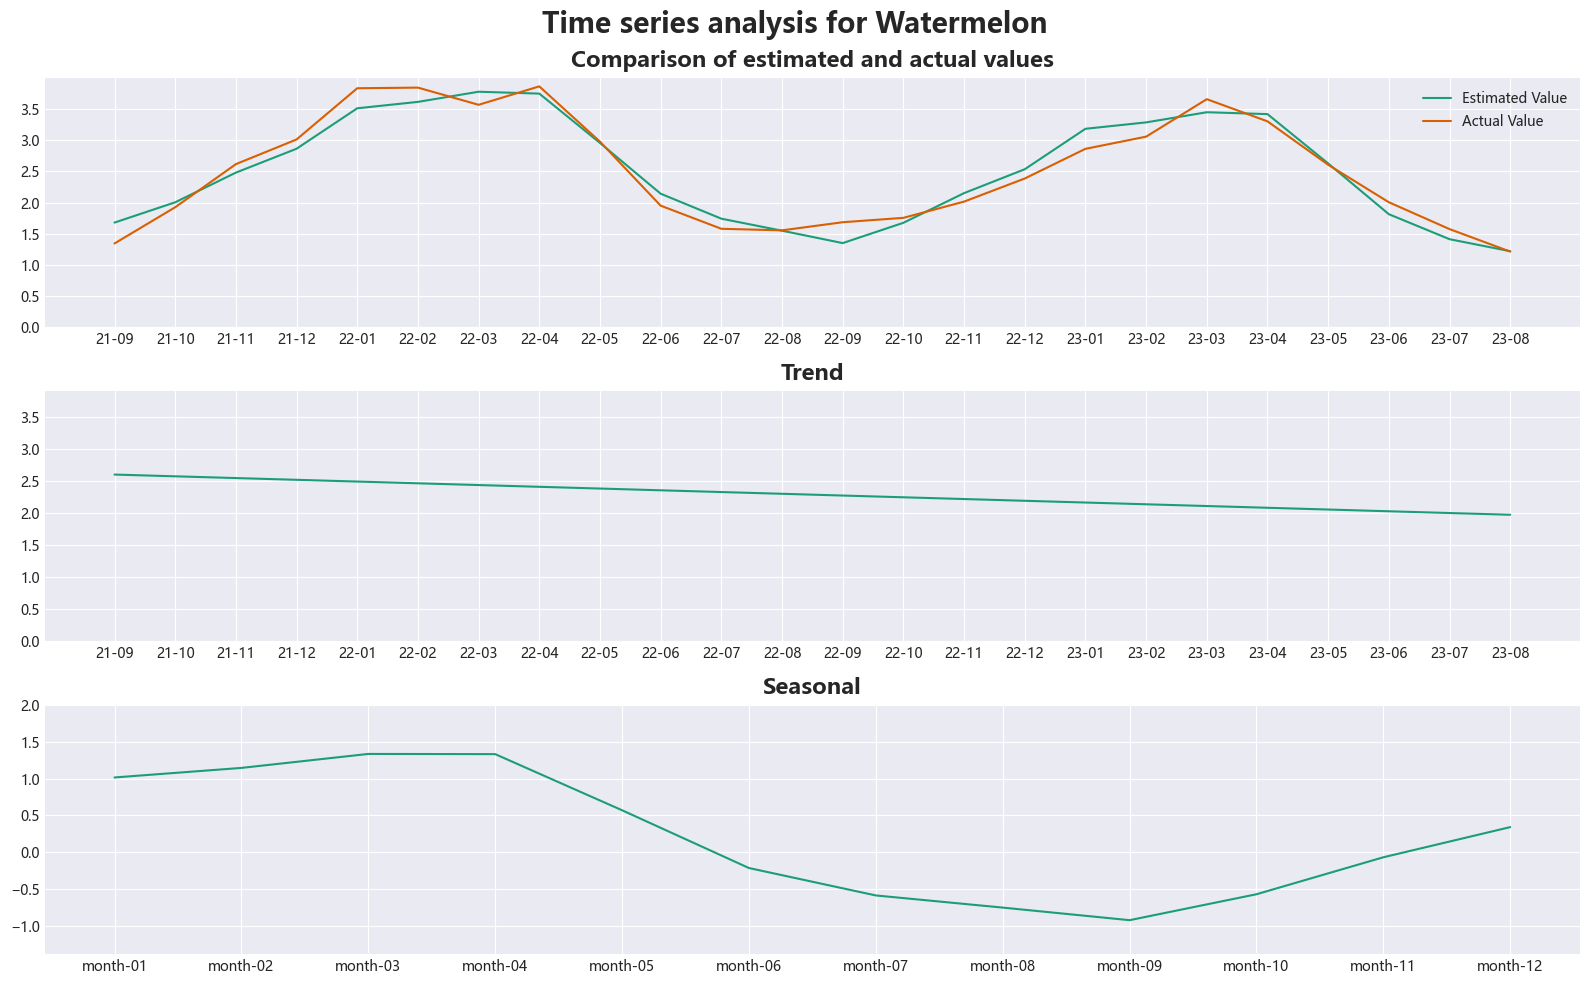

In [36]:
def plot_regression_result(model, fit_result, X, y):
    """
    绘制回归拟合后的图表，包括
    - 估计值和实际值的对比
    - 趋势
    - 季节性
    """
    year_month = [x[-5:] for x in UNIQUE_YEAR_MONTH]

    fig,(ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1,figsize=(16,10))

    params = fit_result.params
    
    ax1.plot(year_month,model.predict(params, X),label="Estimated Value")
    ax1.plot(year_month,y,label="Actual Value")
    ax1.legend()
    ax1.set_ylim(0,)
    ax1.set_title("Comparison of estimated and actual values")

    x = range(1,len(year_month)+1)

    trend = lambda x:params["ts_rank"] * x + params["constant"]

    trend_value = [trend(i) for  i in x]
    ax2.plot(year_month, trend_value)
    ax2.set_ylim(min(0,min(trend_value) * 1.5),max(trend_value) *1.5)
    ax2.set_title("Trend")

    month_coef = params.drop(["ts_rank","constant"])
    month_coef_values = month_coef.values.tolist()
    ax3.plot(month_coef.index.values.tolist(),month_coef_values )
    ax3.set_ylim(min(0,min(month_coef_values) *1.5),max(month_coef_values) *1.5)
    ax3.set_title("Seasonal")
    fig.suptitle(f"Time series analysis for {product}", fontsize=20, fontweight="bold")
    fig.tight_layout()
    
    

def plot_product_regression(product):
    model,fit_result,X,y = fit_regression_model(product)
    plot_regression_result(model,fit_result,X,y)

plot_product_regression(product)

### 计算所有农产品的季节性信息

In [37]:
TEST_ALPHA_VALUE = 0.05

def get_season_info(fit_result,):
    # 检查趋势和季节性的p值是否小于阈值
    pvalue_check = fit_result.pvalues < TEST_ALPHA_VALUE
    # 获取模型参数
    params = fit_result.params

    # 构建时间序列
    x = range(1,len(UNIQUE_YEAR_MONTH)+1)

    # 定义趋势线的函数 / 计算趋势值
    trend = lambda x:params["ts_rank"] * x + params["constant"]
    trend_value = [trend(i) for  i in x]
    
    # 提取季节性参数
    season_params = params.drop(["ts_rank","constant"])

    # 返回季节性信息的字典
    return {
        "is_trend_significant":pvalue_check["ts_rank"],
        "trend_std":np.round(np.std(trend_value),4),
        "trend_slope":np.round(params["ts_rank"],4),
        "season_significant_rate":np.round(pvalue_check.drop(["ts_rank","constant"]).mean(),4),
        "season_std":np.round(season_params.std(),4),
        "season_values":np.round(season_params.values,4),
        "season_pvalues":np.round(fit_result.pvalues.drop(["ts_rank","constant"]).values,4)

    }

#get_season_info(fit_result)

In [38]:
def get_all_prdocut_season_info():
    # 获取所有不同的产品列表
    products = list(set(df["product"].values))
    # 用于收集季节性信息的列表
    season_info_collect  = []
    # 遍历每个产品
    for product in products:
        # 调用拟合回归模型的函数
        model,fit_result,X,y = fit_regression_model(product)
        # 调用获取季节性信息的函数
        season_info = get_season_info(fit_result)
        # 将产品名称添加到季节性信息中
        season_info.update(
            {
                "product":product
            }
        )
        # 将季节性信息添加到列表中
        season_info_collect.append(season_info)
    # 将季节性信息列表转换为 DataFrame
    season_df = pd.DataFrame(season_info_collect)
    return season_df

# 调用函数获取所有产品的季节性信息
season_df = get_all_prdocut_season_info()
#season_df.head()

In [39]:
# 将季节性信息和产品统计信息合并
season_mdf = pd.merge(season_df,product_gdf.reset_index(),on="product")
# 计算新的变异系数和百分比指标
season_mdf = season_mdf.assign(
    season_varc = season_mdf["season_std"]/season_mdf["price_500g_mean"],
    trend_varc = season_mdf["trend_std"]/season_mdf["price_500g_mean"],
    season_varc_percent = season_mdf["season_std"]/season_mdf["price_500g_std"],
    trend_varc_percent = season_mdf["trend_std"]/season_mdf["price_500g_std"],
)

 #season_mdf.sort_values("season_varc",ascending=False).head(1)

### 哪些农产品的季节性更强？

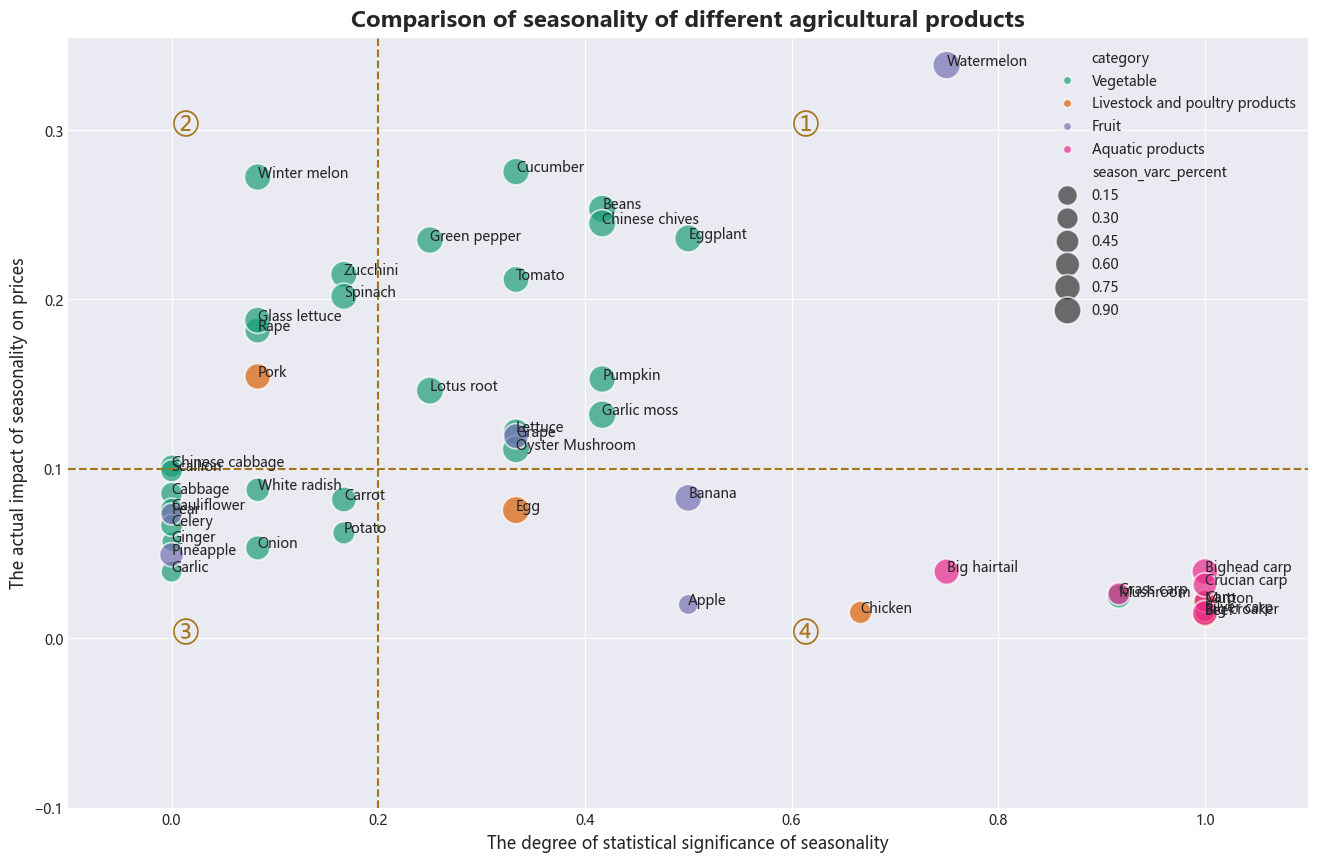

In [40]:
def plot_seasonal_comapre():
    fig,ax=plt.subplots(figsize=(16,10))
    x_col = "season_varc"
    y_col ="price_500g_mean"
    size_col = "season_significant_rate"

    x_col = "season_significant_rate"
    y_col = "season_varc"
    size_col = "season_varc_percent"

    sns.scatterplot(data=season_mdf.sort_values("category",ascending=False),x=x_col,y=y_col,
        size=size_col,hue="category",ax=ax,sizes=(200,400),alpha=0.7)
    ax.set_xlabel("The degree of statistical significance of seasonality")
    ax.set_xlim(-0.1,1.1)
    ax.set_ylabel("The actual impact of seasonality on prices")
    ax.set_ylim(-0.1,)
    for i,j,product in season_mdf[[x_col,y_col,"product"]].values:
        ax.text(i,j,product)
    ax.set_title("Comparison of seasonality of different agricultural products")
    ax.plot([0.2,0.2],[-0.1,0.5],"--",color=colors[-1])
    ax.plot([-0.1,1.1],[0.1,0.1],"--",color=colors[-1])

    ax.text(0.6,0.3,"①",fontdict={"size":20,"color":colors[-1]})
    ax.text(0.0,0.3,"②",fontdict={"size":20,"color":colors[-1]})
    ax.text(0.0,0.0,"③",fontdict={"size":20,"color":colors[-1]})
    ax.text(0.6,0.0,"④",fontdict={"size":20,"color":colors[-1]})
plot_seasonal_comapre()

上图的横坐标是农产品的季节性在统计意义上的显著性程度，纵坐标是季节性对农产品价格的实际影响程度。二者的数值越高，则代表农产品的季节性越强烈。  

基于这两个数值，分别以0.2和0.1作为阈值，可以将农产品划分为四组。  

- 第1组是我们最感兴趣的，其既有统计意义上显著性，在实际意义上也大幅影响价格波动。这一组以蔬菜和水果为主。  
- 唯一的例外是猪肉。虽然猪肉有一定的季节性，但在过去几年，由于其降价趋势的影响，其季节性体现得不明显。  
- 第4组的农产品虽然有统计意义上显著的季节性，但实际对价格影响较小，在实际生活中往往可以忽略不记。  

PS：  

$$  
季节性在统计意义上的显著性程度 = \frac{通过显著性检验的月份}{12}  
$$  

$$  

季节性对于价格的实际影响程度 = \frac{季节性波动的标准差}{价格的平均值}  

$$

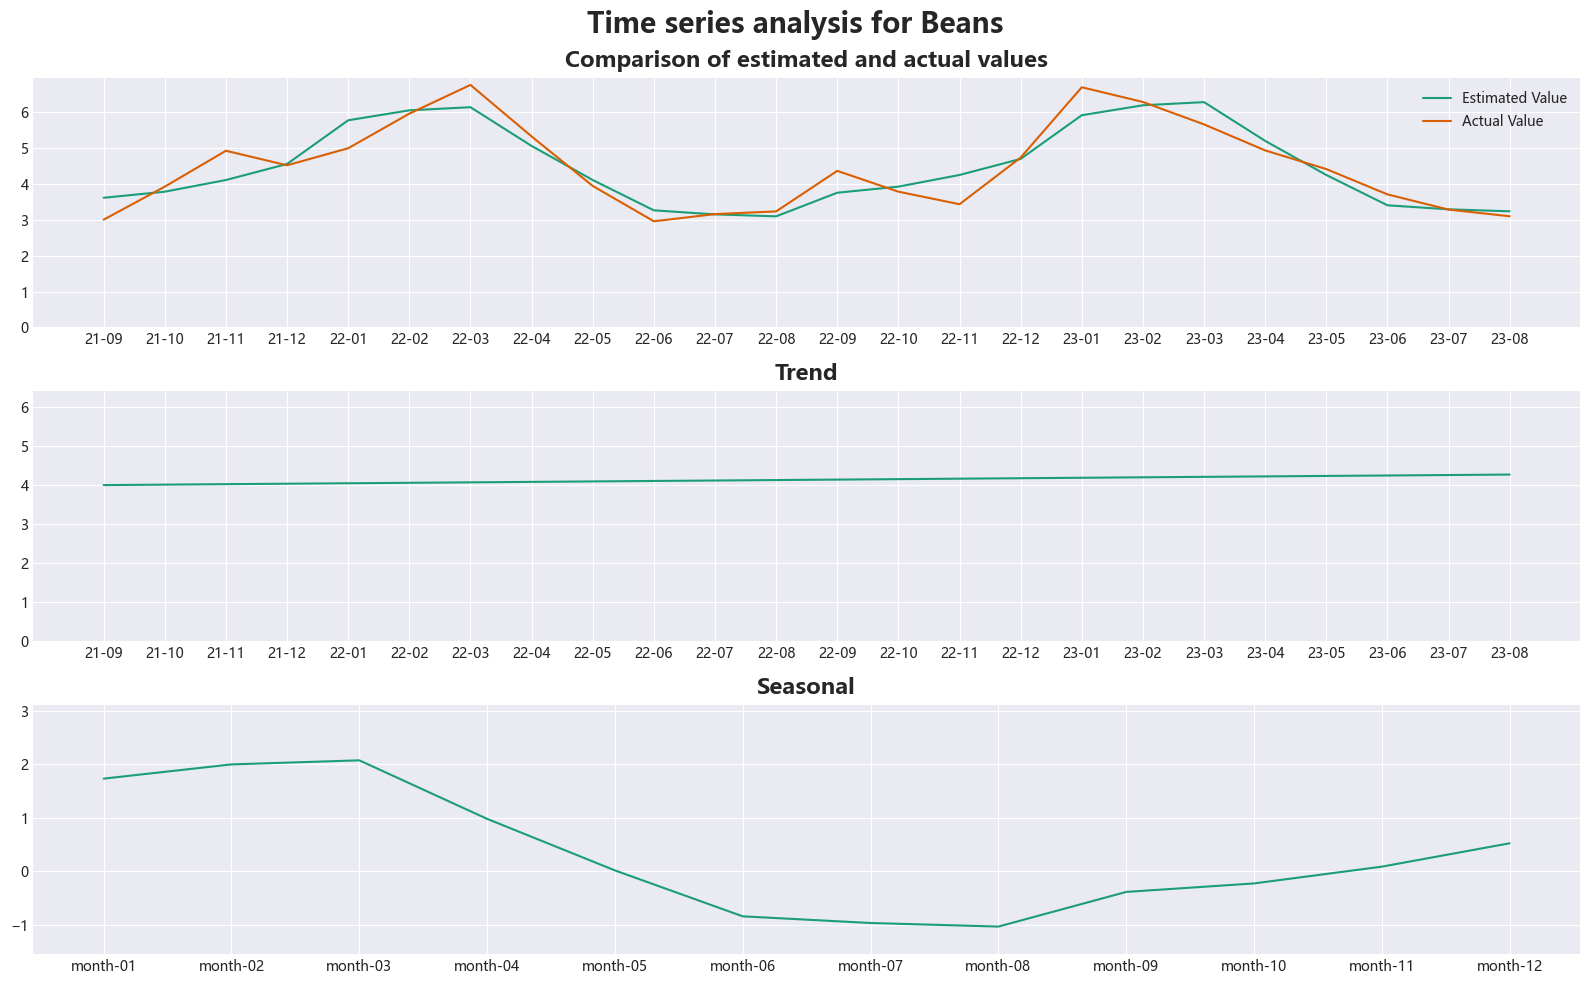

In [41]:
product="Beans"
# product="西瓜"
plot_product_regression(product)

## 时令蔬菜有哪些？

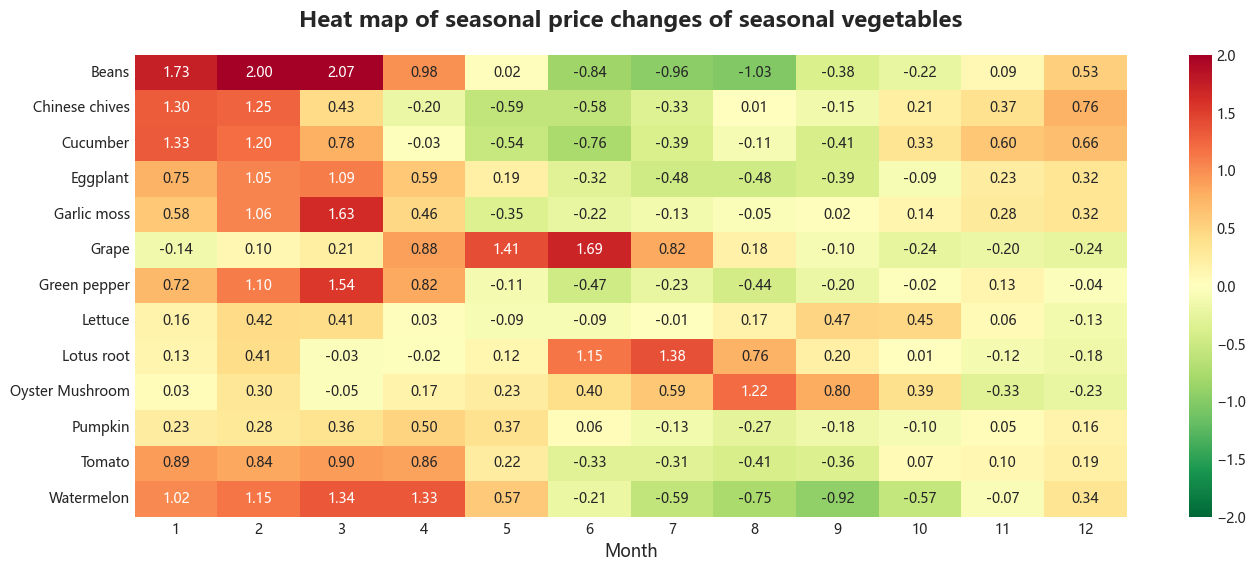

In [42]:
def plot_seasonal_heatmap(min_season_significant_rate=0.2, min_season_varc=0.1,season_varc_percent=0.4):
    query = f"season_significant_rate > {min_season_significant_rate} and season_varc > {min_season_varc} and season_varc_percent > {season_varc_percent}"
    season_sdf = season_mdf.query(query)
    n_product = season_sdf.shape[0]
    season_sdf = season_sdf[["product", "season_values"]].explode(
        "season_values")
    season_sdf = season_sdf.assign(
        year_month=list(range(1, 13)) * n_product,
        season_value=season_sdf["season_values"].map(float)
    )

    season_table = season_sdf.pivot(index = "product",columns =  "year_month",values = "season_value")

    fig, ax = plt.subplots(figsize=(16, 6))
    sns.heatmap(season_table,cmap=mpl.cm.RdYlGn_r,
                norm=mpl.colors.Normalize(-2, 2), annot=True, fmt=".02f", ax=ax)
    ax.set_xlabel("Month")
    ax.set_ylabel("")
    ax.set_title("Heat map of seasonal price changes of seasonal vegetables",pad=20)

plot_seasonal_heatmap(min_season_significant_rate=0.2, min_season_varc=0.1,season_varc_percent=0.4)


季节性价格热力图中，正数代表价格在当季的提升趋势，负数代表价格的下降趋势。  

从整体来看，在春末和夏季有许多蔬菜产品会进入价格较便宜的时期。  

如果根据月份来划分，并认为价格低的原因主要是蔬菜产量提升导致，则推导出各个时间的时令蔬菜有：  

- 4月份-9月份: 韭菜
- 5月份-7月份: 蒜苔 莴笋
- 5月份-9月份: 黄瓜 青椒
- 6月份-9月份: 茄子 西红柿
- 6月份-10月份: 西瓜 豆角
- 7月份-10月份: 南瓜
- 9月份-1月份: 巨峰葡萄
- 11月份-12月份: 莲藕 平菇

## 哪些农产品的价格有明显的涨跌？

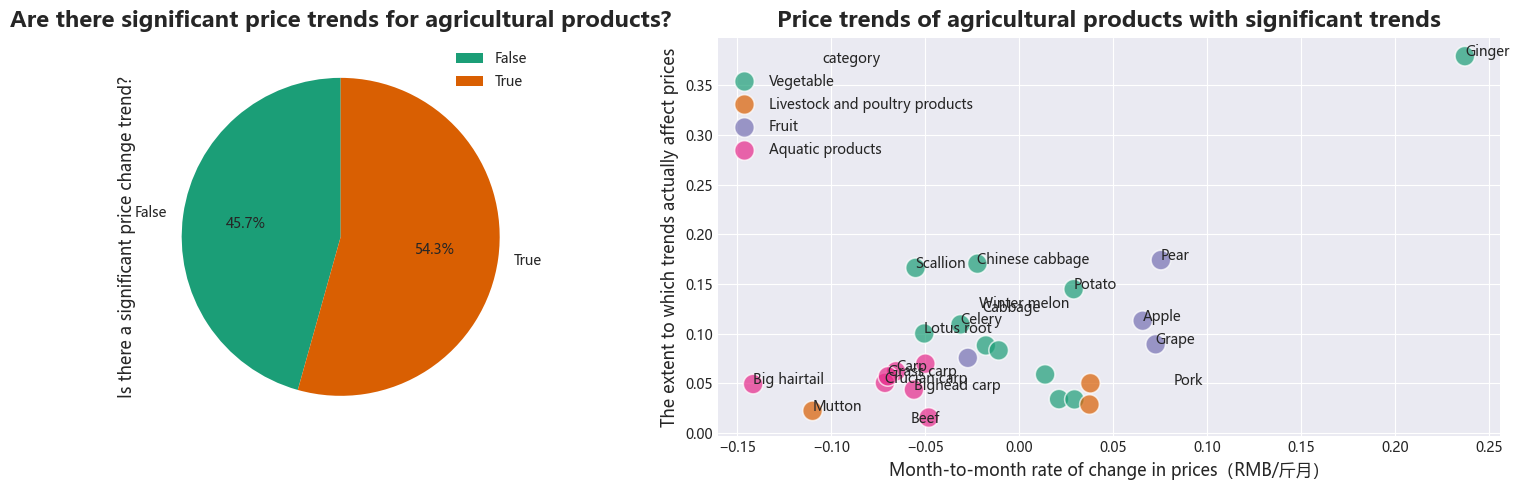

In [43]:
def plot_trend_chart():
    trend_significant_count_df = season_mdf.groupby("is_trend_significant").agg(count=("product","count"))
    trend_product_df = season_mdf.query("is_trend_significant == True")

    x_col = "trend_slope"
    y_col = "trend_varc"
    fig, [ax1,ax2] = plt.subplots(nrows=1,ncols=2,figsize=(16, 5))
    trend_significant_count_df.rename({True:"True",False:"False"}).plot.pie(ax=ax1,y="count",autopct='%1.1f%%',startangle=90)
    ax1.set_title("Are there significant price trends for agricultural products?")
    ax1.set_ylabel("Is there a significant price change trend?")
    
    sns.scatterplot(
        data=trend_product_df.sort_values("category", ascending=False),
        x=x_col,
        y=y_col,
        hue="category",
        ax=ax2,
        alpha=0.7,
        s=200
    )
    for i, j, product in season_mdf[[x_col, y_col, "product"]].values:
        if np.abs(i) > 0.05 or j > 0.1:
            ax2.text(i, j, product)
    ax2.set_title("Price trends of agricultural products with significant trends")
    ax2.set_xlabel("Month-to-month rate of change in prices（RMB/斤月）")
    ax2.set_ylabel("The extent to which trends actually affect prices")
    fig.tight_layout()


plot_trend_chart()


- 约有54.3%的农产品有显著的价格变化趋势。而在有显著的价格变化趋势的产品中，大部分农产品的价格呈现上升趋势。其中水果的价格上升最高。  
- 必需品生姜也有一定的上升趋势。  
- 在价格下降趋势的农产品中，除了我们熟知的羊肉之外，大带鱼也有着显著的下降趋势。其价格历史变化可以参考下图。

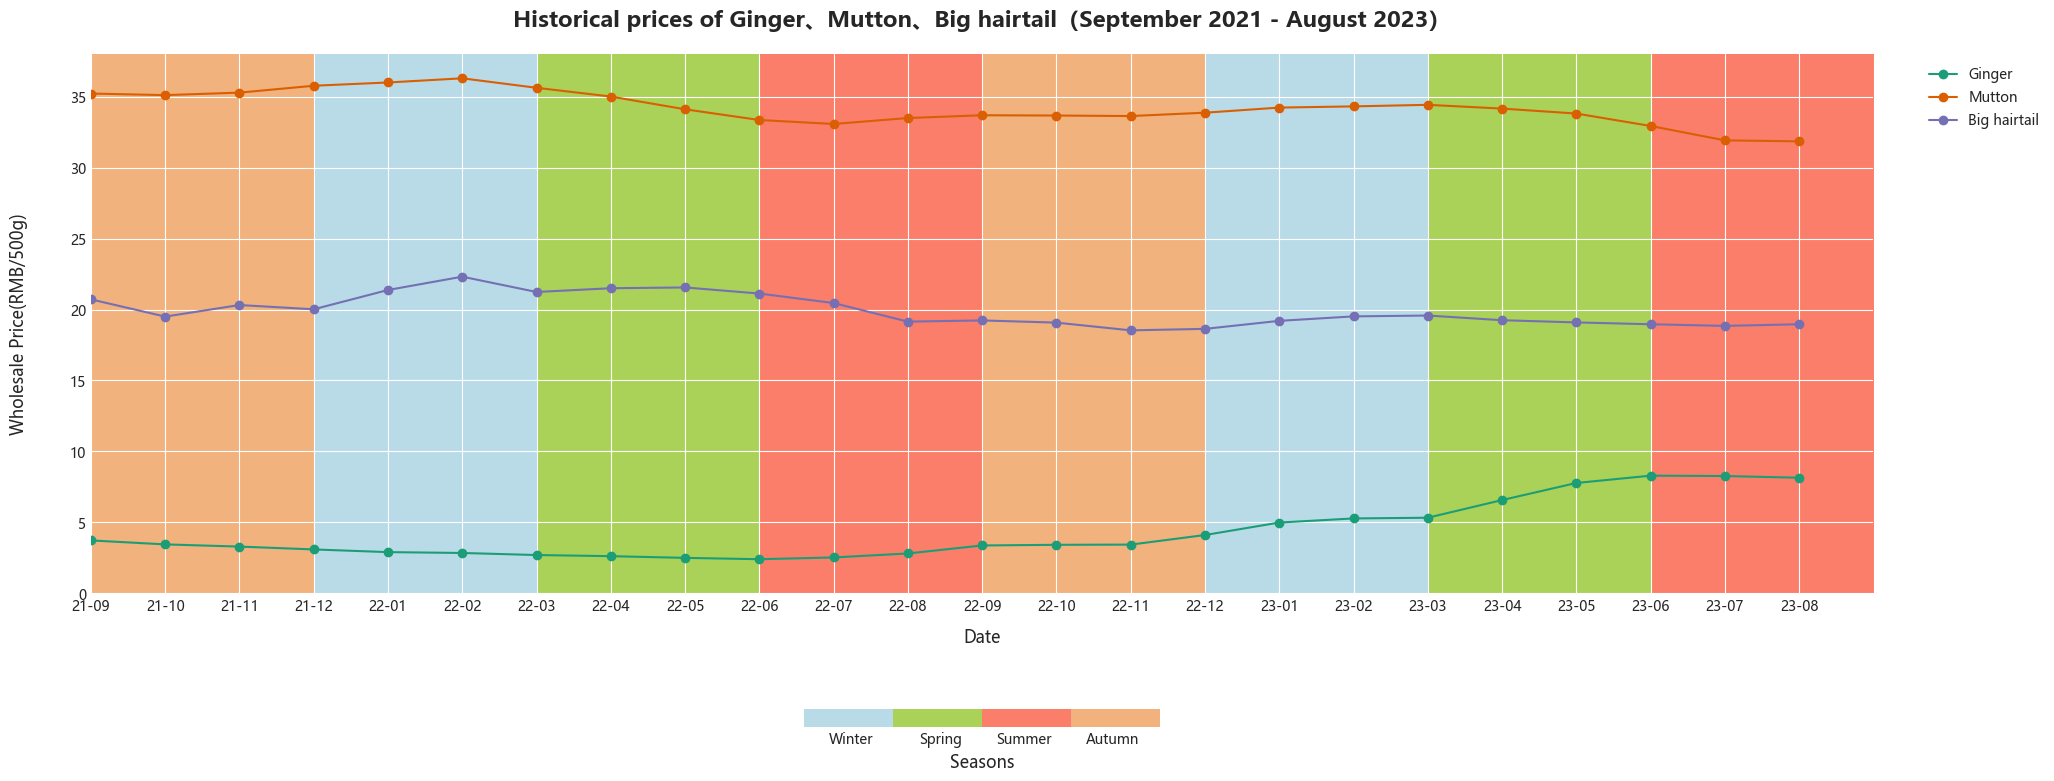

In [44]:
plot_ts(products=["Ginger","Mutton","Big hairtail"])

从中可以看到，生姜的批发价格在2022年6月达到底峰之后就一直逐月上升。生姜价格上升的主要原因是之前生姜价格持续下降，降低了产量。但随后由于产量过低而发生供不应求，从而导致价格上升。  

